# **Importing Packages**

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Log Transformation**
$$ s=c*\log(1+r) $$
$$$$
where c is scalling constant, r is the input pixel value and s is the output pixel value

In [22]:
def apply_log_transform(image, c=1):
    """
    Apply logarithmic transformation to an image.

    Parameters:
    image (numpy.ndarray): Input image
    c (float): Scaling constant to adjust the transformation strength
               Higher values will result in more enhancement

    Returns:
    numpy.ndarray: Log-transformed image
    """
    # Ensure image is in floating point format
    float_img = image.astype(np.float32)

    # Add small constant to avoid log(0)
    float_img = float_img + 1.0

    # Apply log transform
    log_transformed = c * np.log(float_img)

    # Normalize to 0-255 range
    log_transformed = (log_transformed - np.min(log_transformed)) / \
                     (np.max(log_transformed) - np.min(log_transformed))
    log_transformed = (log_transformed * 255).astype(np.uint8)

    return log_transformed

In [18]:
def compare_transforms(image,c):
    """
    Compare original image with its log-transformed version side by side.

    Parameters:
    image (numpy.ndarray): Input image
    """
    # Apply log transform
    transformed = apply_log_transform(image, c)

    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(transformed, cmap='gray')
    ax2.set_title('Log Transformed')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    return transformed

# **Main Method**

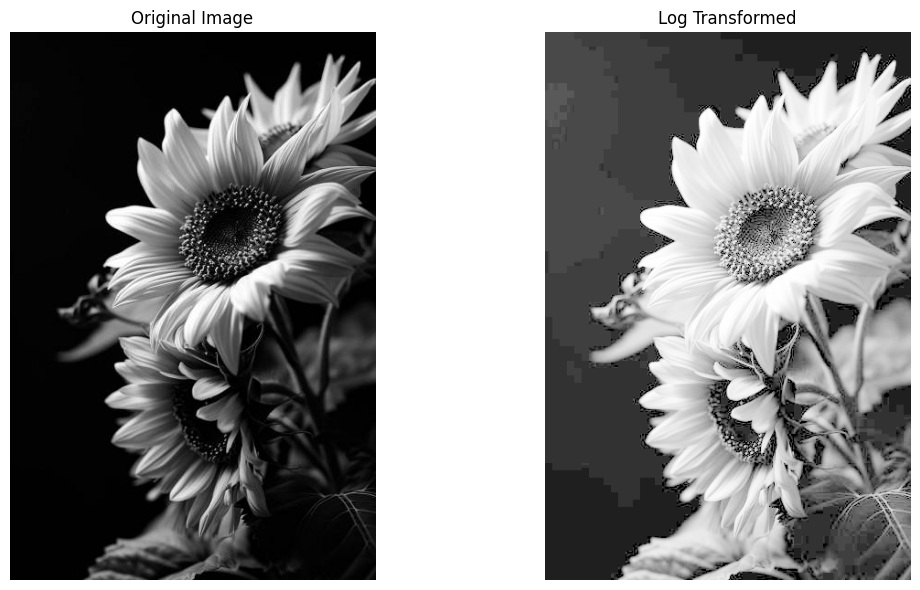

In [25]:
if __name__ == "__main__":
    #Input image path
    image_path = '/content/flower.jpg'

    # Read and display an image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    #Scaling constant
    c = 255/(np.log(1+255))
    # Compare original and transformed images
    transformed_image = compare_transforms(image,c)

    # Save the result
    output_image_path = image_path[:-4]+'_transformed_output_image'+'_'+str(c)+'.jpg'
    cv2.imwrite(output_image_path, transformed_image)